In [2]:
from cgmbrush.cgmbrush import *
from cgmbrush.plots.plots import *
import matplotlib.pyplot as plt
import math

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16
XBIG_SIZE = 20
axis_fontsize = 20
curve_thickness = 2

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=XBIG_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seed = '50g89Gfh03f4Gh0r38h2TfM08' # a consistent random seed to use 



In [3]:
# Load / Generate the Stacked Fields
provider = BolshoiProvider()
resolution = 8
grid_size = resolution * 1024
load_data = True
load_stacked = True
data_date = '2021-11-01'
redshifts = RS_array_gen(1,L)

configs = [
    Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=resolution),
    Configuration(SphericalTophatProfile(), 2, provider=provider, resolution=resolution),
    Configuration(NFWProfile(), 1, provider=provider, resolution=resolution),
    Configuration(FireProfile(), 1, provider=provider, resolution=resolution),
    Configuration(PrecipitationProfile(), 1, provider=provider, resolution=resolution)
]

for c in configs:
    c.RS_array = redshifts
    c.seed = seed
    c.datestamp = data_date 
    c.generate_stacked_field(load_from_files=load_stacked)

STH_256_stacked = configs[0].get_stacked_field()
STH_2_256_stacked = configs[1].get_stacked_field()
NFW_256_stacked = configs[2].get_stacked_field()
fire_256_stacked = configs[3].get_stacked_field()
P_256_stacked = configs[4].get_stacked_field()

Loading stacked field... done
Loading stacked field... done
Loading stacked field... done
Loading stacked field... done
Loading stacked field... done


In [4]:
# Sum up the DM along the stack
# This works out to be approximately correct for these 250 h^-1 Mpc boxes
STH_DM_to_0_1 = sum(STH_256_stacked[0:1,:,:])
STH_DM_to_0_5 = sum(STH_256_stacked[0:5,:,:])
STH_DM_to_1 = sum(STH_256_stacked)

NFW_DM_to_0_1 = sum(NFW_256_stacked[0:1,:,:])
NFW_DM_to_0_5 = sum(NFW_256_stacked[0:5,:,:])
NFW_DM_to_1 = sum(NFW_256_stacked)

fire_DM_to_0_1 = sum(fire_256_stacked[0:1,:,:])
fire_DM_to_0_5 = sum(fire_256_stacked[0:5,:,:])
fire_DM_to_1 = sum(fire_256_stacked)

STH_2_DM_to_0_1 = sum(STH_2_256_stacked[0:1,:,:])
STH_2_DM_to_0_5 = sum(STH_2_256_stacked[0:5,:,:])
STH_2_DM_to_1 = sum(STH_2_256_stacked)

P_DM_to_0_1 = sum(P_256_stacked[0:1,:,:])
P_DM_to_0_5 = sum(P_256_stacked[0:5,:,:])
P_DM_to_1 = sum(P_256_stacked)

# Creating histograms for desired redshift
STH_RS_tenth= create_histograms(STH_256_stacked[0:1,:,:], grid_size)
STH_RS_half = create_histograms(STH_256_stacked[0:5,:,:], grid_size)
STH_RS_one = create_histograms(STH_256_stacked, grid_size)

NFW_RS_tenth= create_histograms(NFW_256_stacked[0:1,:,:], grid_size)
NFW_RS_half = create_histograms(NFW_256_stacked[0:5,:,:], grid_size)
NFW_RS_one = create_histograms(NFW_256_stacked, grid_size)

fire_RS_tenth= create_histograms(fire_256_stacked[0:1,:,:], grid_size)
fire_RS_half = create_histograms(fire_256_stacked[0:5,:,:], grid_size)
fire_RS_one = create_histograms(fire_256_stacked, grid_size)

STH_2_1 = create_histograms(STH_2_256_stacked[0:1,:,:], grid_size)
STH_2_5 = create_histograms(STH_2_256_stacked[0:5,:,:], grid_size)
STH_2_10 = create_histograms(STH_2_256_stacked, grid_size)

P_tenth = create_histograms(P_256_stacked[0:1,:,:], grid_size)
P_half = create_histograms(P_256_stacked[0:5,:,:], grid_size)
P_one = create_histograms(P_256_stacked, grid_size)


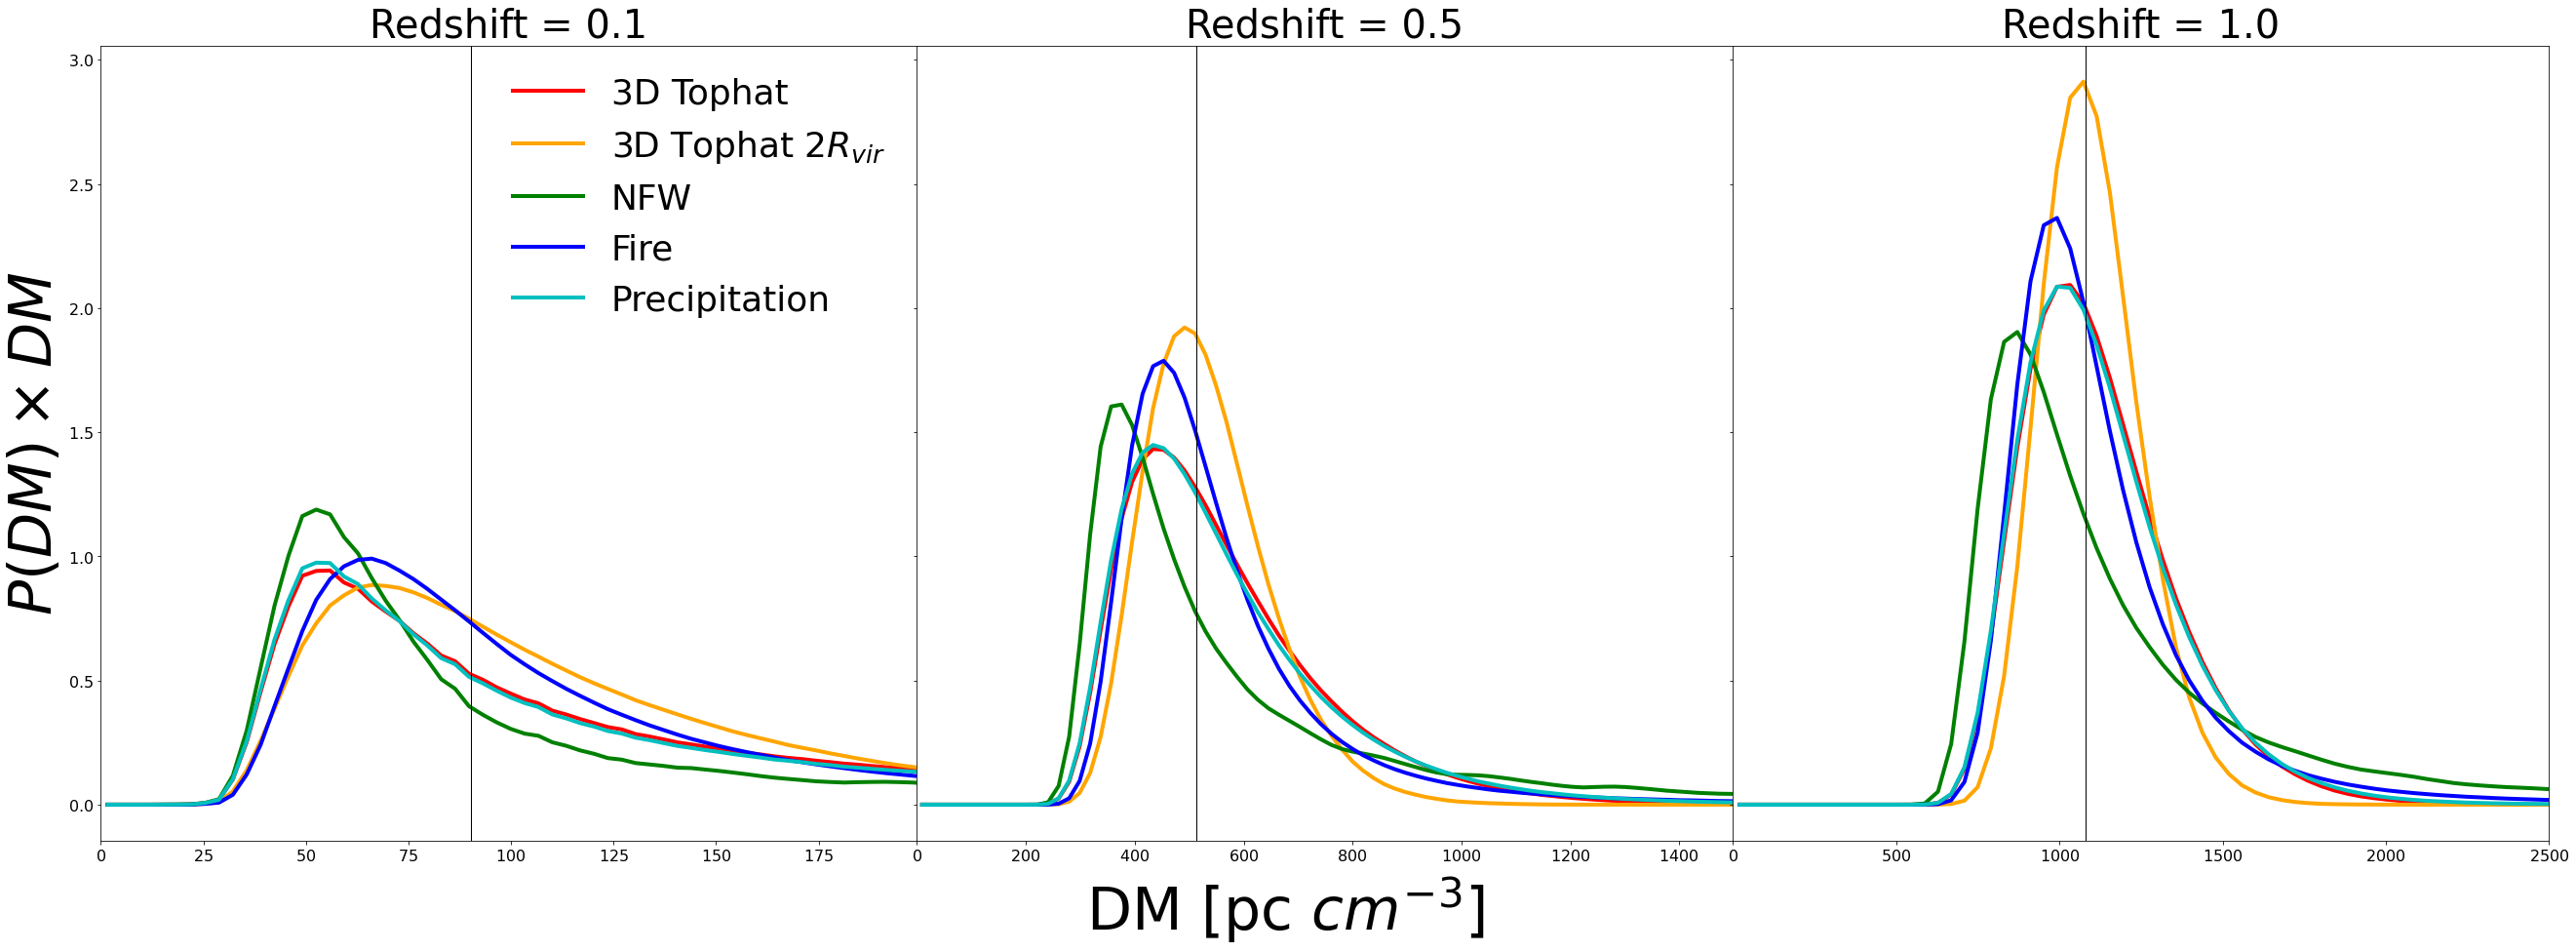

In [5]:
# Figure and subplots
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(45,15))

curve_lw = 4

axs[0].plot(STH_RS_tenth[0],STH_RS_tenth[0]*STH_RS_tenth[1],'-',label='3D Tophat',lw=curve_lw,color='red')
axs[0].plot(STH_2_1[0],STH_2_1[0]*STH_2_1[1],'-',label='3D Tophat 2$R_{vir}$',lw=curve_lw,color='orange')
axs[0].plot(NFW_RS_tenth[0],NFW_RS_tenth[0]*NFW_RS_tenth[1],'-',label='NFW',lw=curve_lw,color='green')
axs[0].plot(fire_RS_tenth[0],fire_RS_tenth[0]*fire_RS_tenth[1],'-',label='Fire',lw=curve_lw,color='blue')
axs[0].plot(P_tenth[0],P_tenth[0]*P_tenth[1],'-',label='Precipitation',lw=curve_lw,color='c')

axs[1].plot(STH_RS_half[0],STH_RS_half[0]*STH_RS_half[1],'-',label='3D Tophat',lw=curve_lw,color='red')
axs[1].plot(STH_2_5[0],STH_2_5[0]*STH_2_5[1],'-',label='3D Tophat 2Rvir',lw=curve_lw,color='orange')
axs[1].plot(NFW_RS_half[0],NFW_RS_half[0]*NFW_RS_half[1],'-',label='NFW',lw=curve_lw,color='green')
axs[1].plot(fire_RS_half[0],fire_RS_half[0]*fire_RS_half[1],'-',label='Fire',lw=curve_lw,color='blue')
axs[1].plot(P_half[0],P_half[0]*P_half[1],'-',label='Fire',lw=curve_lw,color='c')

axs[2].plot(STH_RS_one[0],STH_RS_one[0]*STH_RS_one[1],'-',label='3D Tophat',lw=curve_lw,color='red')
axs[2].plot(STH_2_10[0],STH_2_10[0]*STH_2_10[1],'-',label='3D Tophat 2Rvir',lw=curve_lw,color='orange')
axs[2].plot(NFW_RS_one[0],NFW_RS_one[0]*NFW_RS_one[1],'-',label='NFW',lw=curve_lw,color='green')
axs[2].plot(fire_RS_one[0],fire_RS_one[0]*fire_RS_one[1],'-',label='Fire',lw=curve_lw,color='blue')
axs[2].plot(P_one[0],P_one[0]*P_one[1],'-',label='Fire',lw=curve_lw,color='c')

# Axis range
axs[0].set_xlim(xmin=0,xmax=199)
axs[1].set_xlim(xmin=0,xmax=1499)
axs[2].set_xlim(xmin=0,xmax=2500)

# Subplot titles
axs[0].set_title('Redshift = 0.1',fontsize=40) 
axs[1].set_title('Redshift = 0.5',fontsize=40)
axs[2].set_title('Redshift = 1.0',fontsize=40)

# Mean DM: set for the given redshift
mean=axs[0].axvline(np.mean(STH_DM_to_0_1), color='k', linestyle='-', linewidth=1)
axs[1].axvline(np.mean(STH_DM_to_0_5), color='k', linestyle='-', linewidth=1)
axs[2].axvline(np.mean(STH_DM_to_1), color='k', linestyle='-', linewidth=1)
# mean.set_label('Mean DM')

# Axis labels
fig.text(0.5, 0.04, 'DM [pc $cm^{-3}$]', ha='center',fontsize=60)
axs[0].set_ylabel(r'$ P(DM) \times DM$',fontsize=60)

axs[0].ticklabel_format(useMathText=True)
axs[1].ticklabel_format(useMathText=True)
axs[2].ticklabel_format(useMathText=True)
# axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[0].ticker.LogFormatter(base=10.0)
# import matplotlib.ticker as tick
# axs[0].yaxis.set_major_formatter(tick.LogFormatter())

# legend
axs[0].legend(loc='upper right',prop={'size':36}, frameon=False)


saveFig('fiducial_profiles_RS_hist.pdf', fig, bbox_inches='tight')

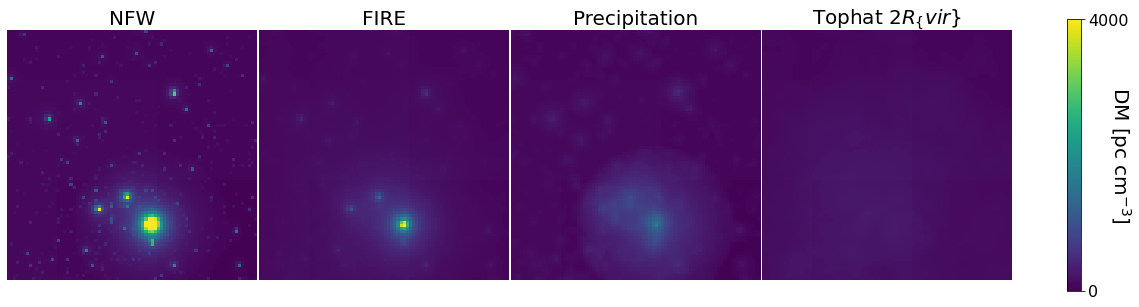

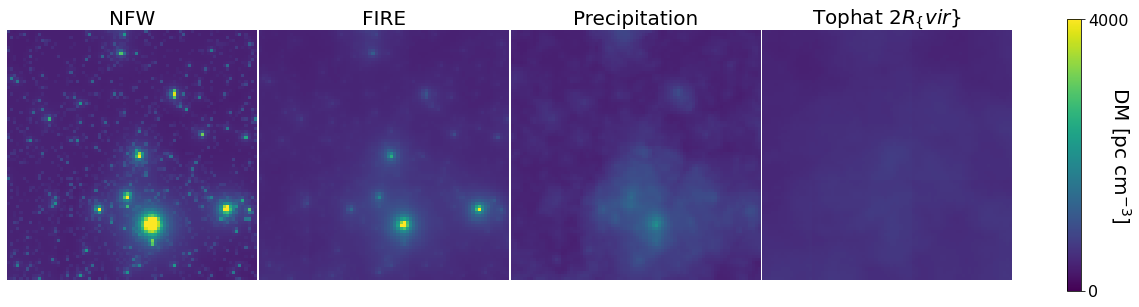

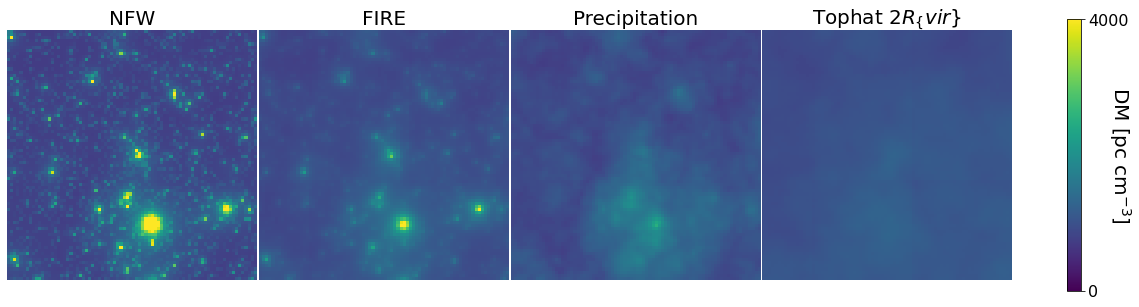

In [7]:
# TODO consider zooming in for profiles close-up
u = 10 * resolution

f01=compare_4_profile_fields(STH_2_DM_to_0_1[0:u,0:u], NFW_DM_to_0_1[0:u,0:u], fire_DM_to_0_1[0:u,0:u], P_DM_to_0_1[0:u,0:u], resolution, 0.1)
f05=compare_4_profile_fields(STH_2_DM_to_0_5[0:u,0:u], NFW_DM_to_0_5[0:u,0:u], fire_DM_to_0_5[0:u,0:u], P_DM_to_0_5[0:u,0:u], resolution, 0.5)
f1=compare_4_profile_fields(STH_2_DM_to_1[0:u,0:u], NFW_DM_to_1[0:u,0:u], fire_DM_to_1[0:u,0:u], P_DM_to_1[0:u,0:u], resolution, 1.0)

In [ ]:
# TODO translate and stack the original fields, removed fields, and addition fields.

